In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Lidar sensor

In [ ]:
class Lidar(object):
    def __init__(self, nbeams=8, fov=60, max_dist=5.0, sampling_pts=20):
        #nbeams = number of sensing beams
        #FOV = field-of-view of Lidar/ coverage in degrees
        #max_dist = maximum distance Lidar can sense
        #sampling_pts = num pts on a given beam for obstacle check
        self.beam_angles = np.deg2rad(np.linspace(-fov/2+np.pi/2,fov/2+np.pi/2,num=nbeams))
        self.line_sampler = max_dist * np.linspace(0, 1, num=sampling_pts)
    
    def set_env(self, grid, grid_res=0.05):
        #2-D occupancy grid and grid_resolution
        self.grid = grid
        self.grid_res = grid_res
    
    def sense_obstacles(self, pose):
        xc, yc, theta = pose
        beam_data = []
        for b in self.beam_angles:
            direction = np.array([np.cos(theta+b), np.sin(theta+b)])
            for d in self.line_sampler:
                beam_x, beam_y = np.array([xc, yc]) + d * direction
                i, j = int(beam_x/self.grid_res), int(beam_y/self.grid_res)
                if self.grid[i][j] == 1:
                    break
            beam_data.append(d)
        return beam_data

### Load grid data

In [ ]:
#custom grid
#choose resolution and dimensions
grid_res = 0.05
grid_span =  50 # square circuit dimensions in m

#calculate grid_shape from grid
# dimensions have to be integers
grid_shape = (np.array([grid_span]*2)/grid_res).astype('int')
#Initialize 
grid_data = np.zeros(grid_shape)

#Create rectangular obstacles in world co-ordinates
#xmin, xmax, ymin, ymax
obstacles = np.array([[25, 26, 10, 40],
                       [2, 8, 16, 20]]) 
for obs in obstacles:
    # calculate obstacles extent in pixel coords
    xmin, xmax, ymin, ymax = (obs/grid_res).astype('int')
    # mark them as occupied
    grid_data[xmin:xmax ,ymin:ymax ] = 1.0

### Testing and plotting

In [ ]:
curr_pose = (8, 12, np.pi/2)
lidar = Lidar(max_dist=10.0)
lidar.set_env(grid_data)
dist = lidar.sense_obstacles(pose=curr_pose)
print(f"Beam distances are {dist}")

Beam distances are [10.0, 10.0, 10.0, 10.0, 4.2105263157894735, 4.2105263157894735, 4.7368421052631575, 4.7368421052631575]


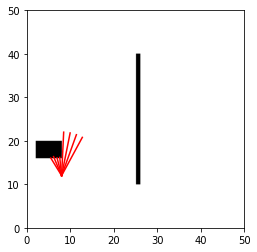

In [ ]:
#calculate the extents    
x1, y1 = 0, 0
x2, y2 = grid_span, grid_span
plt.figure()
plt.imshow(1-grid_data.T, origin='lower', cmap=plt.cm.gray, extent=[x1,x2,y1,y2] )
x, y, theta = curr_pose
for b, tprime in zip(dist, lidar.beam_angles):
    t = tprime+theta
    plt.plot((x, x+b*np.cos(t)),(y, y+b*np.sin(t)),'r-')